Tak jak rozmawialiśmy to jest jedynie bardzo początkowe przejrzenie tych metod (dalej tej Doc2Vec wygląda dość dziwnie), ale przynajmniej wstępne wyniki wyglądają jakby miało to jakiekolwiek szanse zadziałać :D

In [16]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')
from src.graph2vec import OurGraph2Vec
from ipynb.fs.full.github_stargazers import read_stargazers_dataset
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import networkx as nx
import tqdm

In [6]:
without=OurGraph2Vec(window_size=0)

In [4]:
graphs,labels=read_stargazers_dataset("../datasets/github_stargazers")

In [11]:
orderings=[None]*len(graphs)
for it,elem in tqdm.tqdm(enumerate(graphs)):
    orderings[it]=nx.closeness_centrality(elem)

1659it [00:55, 30.06it/s]


KeyboardInterrupt: 

za długo się liczyło więc zrobiłem tak aby móc puścić tylko na części datasetu :D

In [37]:
# tmp123=np.array(list(orderings[1].items()))
# ams=tmp123[:,1][tmp123[:, 0].argsort()]
# ams.argsort()
ams=[None]*1659
for it,elem in enumerate(orderings[:1659]):
    tmp1234=np.array(list(elem.items()))
    ams[it]=tmp1234[:,1][tmp1234[:, 0].argsort()].argsort()

In [38]:
without.fit(graphs[:1659],ordering=ams)

In [49]:
with_dm=OurGraph2Vec(cbowlike=True)

In [52]:
with_dm.fit(graphs[:1659],ordering=ams)

In [18]:
without.get_embedding().shape

(1659, 128)

In [53]:
with_dm.get_embedding().shape

(1659, 128)

In [58]:
labels[:1659].mean()

0.5322483423749247

In [54]:
def create_logreg_model(embedding, get_pred=False):
    X_train, X_test, y_train, y_test=train_test_split(embedding,labels[:1659],test_size=0.3)
    model=LogisticRegression()
    model.fit(X_train,y_train)
    if get_pred:
        return model.predict_proba(X_test),y_test
    return 1-(np.abs(model.predict(X_test)-y_test)).mean()

In [55]:
create_logreg_model(without.get_embedding())

0.5522088353413654

In [56]:
create_logreg_model(with_dm.get_embedding())

0.5562248995983936

In [57]:
create_logreg_model(with_dm.get_embedding()+without.get_embedding())

0.5542168674698795

In [59]:
n=1000
without_res=[0]*n
with_res=[0]*n
combined_res=[0]*n
for it in range(n):
    without_res[it]=create_logreg_model(without.get_embedding())
    with_res[it]=create_logreg_model(with_dm.get_embedding())
    combined_res[it]=create_logreg_model(with_dm.get_embedding()+without.get_embedding())

In [60]:
import seaborn as sns
import pandas as pd

<AxesSubplot:>

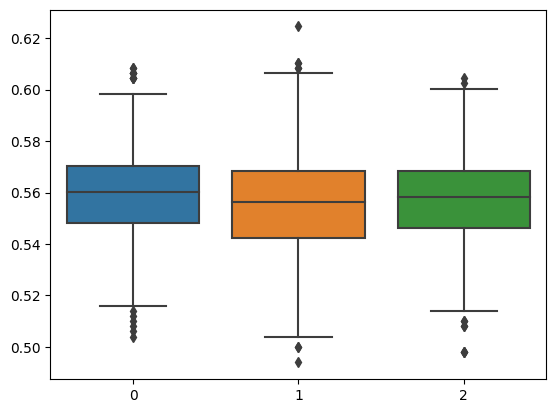

In [61]:
sns.boxplot([without_res,with_res,combined_res])#,labels=["Skipgram","CBOW","Combined"])